# PREFERENCES AS BINARY RELATIONS

1.
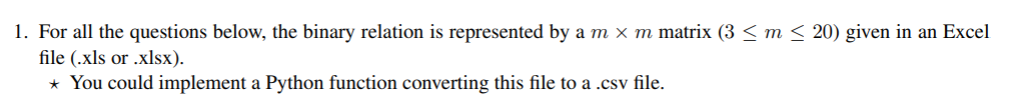

In [221]:
import pandas as pd
import numpy as np

data = {
    'a': [1, 1, 1, 1, 1, 1],
    'b': [0, 1, 1, 1, 1, 1],
    'c': [0, 0, 1, 1, 1, 1],
    'd': [0, 0, 0, 1, 0, 0],
    'e': [0, 0, 0, 1, 1, 1],
    'f': [0, 0, 0, 0, 1, 1],
}

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f'])

xlsx_file_path = 'binary_relation.xlsx'
df.to_excel(xlsx_file_path)

xlsx_file_path

'binary_relation.xlsx'

In [222]:
# Convert the Excel file to CSV format
csv_file_path = 'binary_relation.csv'
df.to_csv(csv_file_path)

csv_file_path

'binary_relation.csv'

2. Implement a Python function Visualizebinaryrelation showing a graphical
representation of the matrix, by using an appropriate package like networkx or matplotlib

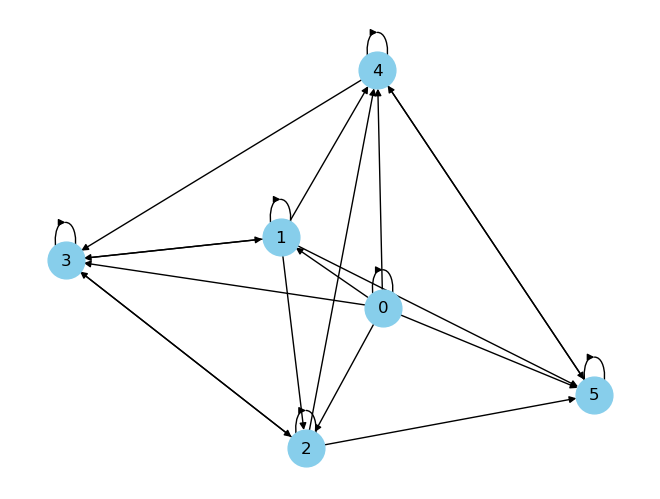

In [223]:
import matplotlib.pyplot as plt
import networkx as nx

def Visualizebinaryrelation(matrix):
    """
    This function takes a binary relation matrix and visualizes it using a directed graph.
    """
    G = nx.DiGraph()  
    n = len(matrix)  
    for i in range(n):
        for j in range(n):
            if matrix.iat[i, j] == 1: 
                G.add_edge(matrix.index[i], matrix.columns[j]) 

    pos = nx.spring_layout(G)  
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', arrows=True)
    plt.show()

Visualizebinaryrelation(df)

3. Build a Python function CompleteCheck testing if a binary relation is complete.

In [224]:
def CompleteCheck(matrix):
    """
    This function checks if a binary relation matrix is complete.
    """
    return matrix.all().all()

CompleteCheck(df)

False

4. Build a Python function ReflexiveCheck testing if a binary relation is reflexive.

In [225]:
def ReflexiveCheck(matrix):
    """
    This function checks if a binary relation matrix is reflexive.
    """
    return matrix.values.diagonal().all()

ReflexiveCheck(df)

True

5. Build a Python function AsymmetricCheck testing if a binary relation is asymmetric.

In [226]:
def AsymmetricCheck(matrix):
    """
    This function checks if a binary relation matrix is asymmetric.
    """
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix.iat[i, j] == 1 and matrix.iat[j, i] == 1:
                return False  
    return True 

AsymmetricCheck(df)

False

6. Build a Python function SymmetricCheck testing if a binary relation is symmetric.

In [227]:
def SymmetricCheck(matrix):
    """
    This function checks if a binary relation matrix is symmetric.
    """
    return (matrix == matrix.T).all().all()

SymmetricCheck(df)

False

7. Build a Python function AntisymmetricCheck testing if a binary relation is antisymmetric.

In [228]:
def AntisymmetricCheck(matrix):
    """
    This function checks if a binary relation matrix is antisymmetric.
    """
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix.iat[i, j] == 1 and matrix.iat[j, i] == 1:
                if i != j:
                    return False  
    return True 

AntisymmetricCheck(df)

False

8. Build a Python function TransitiveCheck testing if a binary relation is transitive.

In [229]:
def TransitiveCheck(matrix):
    """
    This function checks if a binary relation matrix is transitive.
    """
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix.iat[i, j] == 1:
                for k in range(matrix.shape[0]):
                    if matrix.iat[j, k] == 1 and matrix.iat[i, k] != 1:
                        return False
    return True

TransitiveCheck(df)

False

9. Build a Python function NegativetransitiveCheck testing if a binary relation is negativetransitive.

In [230]:
def NegativeTransitiveCheck(matrix):
    """
    This function checks if a binary relation matrix is negatively transitive.
    """
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix.iat[i, j] == 0:
                for k in range(matrix.shape[0]):
                    if matrix.iat[j, k] == 0 and matrix.iat[i, k] != 0:
                        return False
    return True

NegativeTransitiveCheck(df)

False

10. Build a Python function CompleteOrderCheck testing if a binary relation is a total order.

In [231]:
def CompleteOrderCheck(matrix):
    """
    This function checks if a binary relation matrix is a total order.
    """
    return CompleteCheck(matrix) and AntisymmetricCheck(matrix) and TransitiveCheck(matrix)

CompleteOrderCheck(df)

False

11. Build a Python function CompletePreOrderCheck testing if a binary relation is a complete pre-order.

In [232]:
def CompletePreOrderCheck(matrix):
    """
    This function checks if a binary relation matrix is a pre-order.
    """
    return ReflexiveCheck(matrix) and TransitiveCheck(matrix)

CompletePreOrderCheck(df)

False

12. Build a Python function StrictRelation returning the asymmetric part of a binary relation.

In [233]:
def StrictRelation(matrix):
    """
    This function returns the asymmetric part of a binary relation matrix.
    """
    m = matrix.shape[0]
    strict_matrix = pd.DataFrame(np.zeros((m, m), dtype=int), index=matrix.index, columns=matrix.columns)
    
    for i in range(m):
        for j in range(m):
            if matrix.iat[i, j] == 1 and matrix.iat[j, i] == 0:
                strict_matrix.iat[i, j] = 1
                
    return strict_matrix

StrictRelation(df)

,a,b,c,d,e,f
a,0,0,0,0,0,0
b,1,0,0,0,0,0
c,1,1,0,0,0,0
d,1,1,1,0,1,0
e,1,1,1,0,0,0
f,1,1,1,0,0,0


13. Build a Python function IndifferenceRelation returning the symmetric part of a binary relation.

In [234]:
def IndifferenceRelation(matrix):
    # Create the empty indifference relation matrix
    indifference_matrix = pd.DataFrame(np.zeros(matrix.shape, dtype=int), index=matrix.index, columns=matrix.columns)
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix.iat[i, j] == 1 and matrix.iat[j, i] == 1:
                indifference_matrix.iat[i, j] = 1  
    
    return indifference_matrix

IndifferenceRelation(df)

,a,b,c,d,e,f
a,1,0,0,0,0,0
b,0,1,0,0,0,0
c,0,0,1,0,0,0
d,0,0,0,1,0,0
e,0,0,0,0,1,1
f,0,0,0,0,1,1


14. Build a Python function Topologicalsorting1 returning a topological sorting of a given binary relation without cycles and the indifference pairwise comparisons (the binary relation contains only the asymmetric part).

In [235]:
from collections import deque

def topological_sort(matrix):
    """
    This function performs a topological sorting of a binary relation matrix
    without cycles and the indifference pairwise comparisons (the binary relation contains only the asymmetric part).
    """
    n = matrix.shape[0]
    in_degree = [0] * n
    
    # Calculate in-degree
    for i in range(n):
        for j in range(n):
            if matrix.iat[i, j] == 1:
                in_degree[j] += 1

    # Create a queue for nodes with 0 in-degree
    queue = deque([i for i in range(n) if in_degree[i] == 0])
    topo_order = []

    while queue:
        node = queue.popleft()
        topo_order.append(node)

        for neighbor in range(n):
            if matrix.iat[node, neighbor] == 1:
                in_degree[neighbor] -= 1
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)

    if len(topo_order) == n:
        return topo_order
    else:
        raise ValueError("The graph contains a cycle, topological sorting is not possible.")

def Topologicalsorting1(matrix):
    """
    This function performs a topological sorting of a binary relation matrix.
    """
    labels = matrix.index.tolist()  # Get the labels (letters a, b, c, etc.)

    try:
        topo_order = topological_sort(matrix)
    except ValueError:
        print("Graph contains a cycle. Removing cycles.")
        G = nx.DiGraph([(i, j) for i in range(matrix.shape[0]) for j in range(matrix.shape[1]) if matrix.iat[i, j] == 1])
        # Remove cycles
        G = nx.DiGraph([(u, v) for u, v in G.edges() if not nx.has_path(G, v, u)])
        acyclic_matrix = pd.DataFrame(0, index=matrix.index, columns=matrix.columns)
        for u, v in G.edges():
            acyclic_matrix.at[labels[u], labels[v]] = 1
        topo_order = topological_sort(acyclic_matrix)

    # Convert numeric topo_order to corresponding labels
    return [labels[i] for i in topo_order]

Topologicalsorting1(df)

Graph contains a cycle. Removing cycles.


['d', 'f', 'e', 'c', 'b', 'a']

15. Build a Python function Topologicalsorting2 returning a topological sorting of a given binary relation where the indifference pairwise comparisons exist (both asymmetric and symmetric parts are nonempty).

In [236]:
def IndifferenceTopologicalsorting(matrix):
    indifference_matrix = IndifferenceRelation(matrix)
    return Topologicalsorting1(indifference_matrix)

IndifferenceTopologicalsorting(df)

Graph contains a cycle. Removing cycles.


['a', 'b', 'c', 'd', 'e', 'f']

16. Test all the functions above, by using the binary relation B on a set X = {a, b, c, d, e, f} defined by :

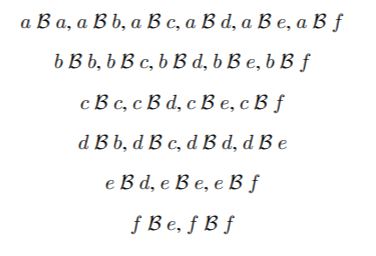

In [237]:
data = [
    [1, 1, 1, 1, 1, 1],  
    [0, 1, 1, 1, 1, 1],  
    [0, 0, 1, 1, 1, 1],  # c
    [0, 1, 1, 1, 0, 0],  
    [0, 0, 0, 1, 1, 1],  # e
    [0, 0, 0, 0, 1, 1]   # f
]

df = pd.DataFrame(data)
print(df)

   0  1  2  3  4  5
0  1  1  1  1  1  1
1  0  1  1  1  1  1
2  0  0  1  1  1  1
3  0  1  1  1  0  0
4  0  0  0  1  1  1
5  0  0  0  0  1  1


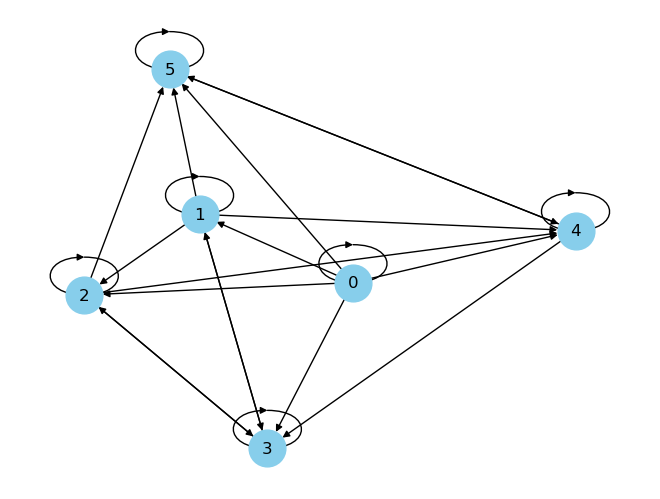

In [238]:
# Test All the functions with new Matrix
Visualizebinaryrelation(df)

In [239]:
from IPython.display import display

# Test All the functions with new Matrix
print("\n3. CompleteCheck:")
display(CompleteCheck(df))

print("\n4. ReflexiveCheck:")
display(ReflexiveCheck(df))

print("\n5. AsymmetricCheck:")
display(AsymmetricCheck(df))

print("\n6. SymmetricCheck:")
display(SymmetricCheck(df))

print("\n7. AntisymmetricCheck:")
display(AntisymmetricCheck(df))

print("\n8. TransitiveCheck:")
display(TransitiveCheck(df))

print("\n9. NegativeTransitiveCheck:")
display(NegativeTransitiveCheck(df))

print("\n10. CompleteOrderCheck:")
display(CompleteOrderCheck(df))

print("\n11. CompletePreOrderCheck:")
display(CompletePreOrderCheck(df))

print("\n12. StrictRelation:")
display(StrictRelation(df))

print("\n13. IndifferenceRelation:")
display(IndifferenceRelation(df))

print("\n14. Topologicalsorting1:")
display(Topologicalsorting1(df))

print("\n15. IndifferenceTopologicalsorting:")
display(IndifferenceTopologicalsorting(df))


3. CompleteCheck:


False


4. ReflexiveCheck:


True


5. AsymmetricCheck:


False


6. SymmetricCheck:


False


7. AntisymmetricCheck:


False


8. TransitiveCheck:


False


9. NegativeTransitiveCheck:


False


10. CompleteOrderCheck:


False


11. CompletePreOrderCheck:


False


12. StrictRelation:


,0,1,2,3,4,5
0,0,1,1,1,1,1
1,0,0,1,0,1,1
2,0,0,0,0,1,1
3,0,0,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,0,0,0



13. IndifferenceRelation:


,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,1,0,0
2,0,0,1,1,0,0
3,0,1,1,1,0,0
4,0,0,0,0,1,1
5,0,0,0,0,1,1



14. Topologicalsorting1:
Graph contains a cycle. Removing cycles.


[0, 1, 2, 3, 4, 5]


15. IndifferenceTopologicalsorting:
Graph contains a cycle. Removing cycles.


[0, 1, 2, 3, 4, 5]

17. Build a Python function generatebinaryrelation generating a binary relation, on a set of 6 objects, containing at least 10 pairwise comparisons and such that the transitive and negative transitive properties are not satis

In [240]:
import numpy as np
import pandas as pd

def generate_binary_relation(n, m):
    """
    Generate a binary relation matrix with n objects and m pairwise comparisons,
    ensuring both transitive and negative transitive properties are not satisfied.
    """
    data = np.zeros((n, n), dtype=int)  

    pairs = set()
    while len(pairs) < m:
        i, j = np.random.randint(n), np.random.randint(n)
        if i != j:  # Ensure no self-relations
            pairs.add((i, j))

    for i, j in pairs:
        data[i, j] = 1

    # Ensure transitive property is violated
    data[0, 1] = 1  # a -> b
    data[1, 2] = 1  # b -> c
    data[0, 2] = 0  # a -> c does not exist (violates transitivity)

    # Ensure negative transitive property is violated
    data[0, 3] = 1  # a -> d
    data[1, 3] = 1  # b -> d
    data[3, 4] = 1  # d -> e
    data[0, 4] = 1  # a -> e (violates negative transitivity)

    return pd.DataFrame(data, index=range(n), columns=range(n))

df = generate_binary_relation(6, 10)
print(df)

   0  1  2  3  4  5
0  0  1  0  1  1  0
1  0  0  1  1  0  0
2  1  0  0  1  0  0
3  0  1  0  0  1  1
4  0  1  0  1  0  1
5  1  0  1  0  0  0
